In [43]:
import matplotlib.pyplot as plt
import sklearn as skl
import pandas as pd
import numpy as np

# First Method in Pure Python
Idea: Look for market extremes. 

Definition of Market Extremes:
    Market extremes are when there is major lack of liquidity. I defined a Lack of Liquidity as a situation where the Bid-Ask spread was greater than 5 pips in width. This is a case where the occurance is greater than the 50th percentile. In this sample there was 77 occurances (.12 % of the occurances). 

In [44]:
#use pandas to import the 
GU = pd.read_csv("GBPUSD1d.csv")
list(GU)

['2.01305E+13', '1.55358', '1.55371']

In [45]:
biddf = GU['1.55358']
askdf = GU['1.55371']

In [46]:
bid = list(biddf)
ask = list(askdf)
print(type(bid))
print(type(ask))

<class 'list'>
<class 'list'>


In [47]:
spread = []
for i in range(len(bid)): 
    spread.append(ask[i]-bid[i])


In [48]:
spread_list = spread

In [49]:
print(len(spread))
print(type(spread))

62011
<class 'list'>


In [50]:
type(spread)

list

In [70]:
maxspread = []
for i in spread_list:
    if i > .0007:
        maxspread.append(i)
print(len(maxspread), type(maxspread))

18 <class 'list'>


In [71]:
print(type(maxspread))
print(len(maxspread))
print(type(spread))

<class 'list'>
18
<class 'numpy.float64'>


In [76]:
price = []
for i in range(len(bid)):
    price.append((bid[i]+ask[i])/2)
print(len(price), type(price))

62011 <class 'list'>


In [73]:
ind = np.linspace(0,62010,62011)

In [74]:
price_index = zip(price,ind)
price_index_dict = {}
for price, ind in price_index:
    price_index_dict[price]=ind

In [77]:
price_spread = zip(spread_list, price)

#print(type(price_spread))
spread_dict={}
for avg, spread in price_spread:
    spread_dict[avg] = spread



In [78]:
ind_list = []
for i in maxspread:
    p = spread_dict[i]
    ind_list.append(price_index_dict[p])

In [81]:
print(ind_list)


[61396.0, 61396.0, 61736.0, 61830.0, 48467.0, 48467.0, 50947.0, 50947.0, 50947.0, 51083.0, 50933.0, 48450.0, 51091.0, 49742.0, 49993.0, 49993.0, 61855.0, 57135.0]


In [90]:
set1 = price[61730:61930]
set1x = np.linspace(0,199,200)

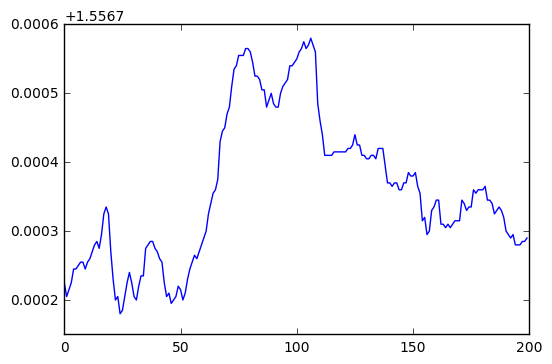

In [91]:
plt.plot(set1x,set1)
plt.show()

In [16]:
import scipy.stats.stats as spss
spss.pearsonr(spread_list,price)

(-0.17978766571519189, 0.0)

In [17]:
np.corrcoef(spread_list, price)

array([[ 1.        , -0.17978767],
       [-0.17978767,  1.        ]])